# Image Screen

---
手工筛数据脚本
将选好的图片下标保存到json方便后续处理

In [1]:
import cv2
import json
import os
import numpy
import matplotlib.pyplot as plt

In [2]:
im_dir = './split/'
im_names = os.listdir(im_dir)

In [ ]:
json_backups = './im_index.json'
info = json.load(open(json_backups,'r'))

In [ ]:
index = info['index']
full_body_names = info['full_body_names']
sideways_names = info['sideways_names']

In [50]:
index = 0
full_body_names = []
sideways_names = []

9 split_0-81-3_0.jpg


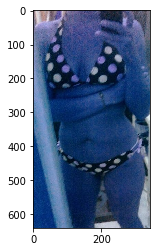

In [60]:
name = im_names[index]
path = os.path.join(im_dir,name)
im = cv2.imread(path)
print(index,name)
plt.imshow(im)
plt.show()
index += 1

In [ ]:
full_body_names.append(name)
print(name)
print(len(full_body_names))

In [ ]:
sideways_names.append(index-1)
print(index-1)
print(len(sideways_names))

In [ ]:
full_body_indexs.remove(1478)

In [ ]:
sideways_indexs.remove(504)

In [ ]:
new_infos = {'index':index,
             'full_body_indexs':full_body_names,
             'sideways_indexs':sideways_names}
print(index)
f = open('im_index.json','w')
f.write(json.dumps(new_infos,indent=1))

# generate json

---
根据筛选出来的结果，生成对应的json文件

In [ ]:
import json
f = open('./output/women_v2_label_by_shape.json','r')
infos = json.load(f)
f.close()

In [ ]:
new_infos = {}
for i,name in enumerate(full_body_names):
    name = im_names[index]
    new_infos[name] = infos[name]
    print(i+1,'/',len(full_body_indexs),end='\r')

In [ ]:
f = open('./output/women_v3_label_by_shape.json','w')
f.write(json.dumps(new_infos,indent=2))
f.close()

# split im number per im

---
筛选split（通过box截出来的women_im的图片）
查看每张图片是否截出来多个人

In [9]:
import os
im_names = os.listdir('./split')

In [19]:
name_statistic = {}
for i,name in enumerate(im_names):
    im_name = name.split('_')[1]
    index = name.split('_')[2][:-4]
    if index != '0':
        print(name)
    if im_name not in name_statistic.keys():
        name_statistic[im_name] = 0
    name_statistic[im_name] += 1

In [15]:
multi_split = []
for name in name_statistic.keys():
    if name_statistic[name] != 1:
        print(name,name_statistic[name])
        multi_split.append((name,name_statistic[name]))

In [16]:
multi_split

[]

# match label and split im

---
将split的图片与label进行对应

In [1]:
import json
f = open('./women_v1_label_by_bmi.json','r')
infos = json.load(f)
f.close()

In [2]:
import os
im_names = os.listdir('./split/')

In [3]:
new_infos = {}
for i,name in enumerate(im_names):
    print(i+1,'/',len(im_names),end='\r')
    im_name = name.split('_')[1]+'.jpg'
    if im_name not in infos.keys():
        continue
    new_infos[name] = infos[im_name]

In [4]:
len(new_infos)

13729

In [5]:
f = open('./women_v5_label_by_bmi.json','w')
f.write(json.dumps(new_infos,indent=2))

998931

# match label and human im

In [50]:
import json
f = open('./dataset_v1_label_by_bmi.json','r')
infos = json.load(f)
f.close()

In [51]:
import os
im_names = os.listdir('./image_women_human/')

In [54]:
dd = {}
for name in im_names:
    base_name = name.split('_')[0]
    if base_name not in dd.keys():
        dd[base_name] = 0
    dd[base_name] += 1
num = 0
for key in dd.keys():
    if dd[key] == 1:
        num += 1
print(num)

12615


In [59]:
new_infos = {}
for i,name in enumerate(im_names):
    print(i+1,'/',len(im_names),end='\r')
    im_name = name.split('_')[0]+'.jpg'
    index = name.split('_')[1].split('.')[0]
    if im_name not in infos.keys() or index != '0':
        continue
    new_infos[name] = infos[im_name]

In [60]:
f = open('./women_v6_label_by_bmi.json','w')
f.write(json.dumps(new_infos,indent=2))

1010901

In [57]:
len(new_infos)

0

# partition

---
分割数据集，分成训练集和验证集，按10%比例分

In [63]:
import json
import random

In [64]:
f = open('./dataset_v6_label_by_bmi.json','r')
info = json.load(f)

In [65]:
all_num = len(info)
val_rate = 0.1
val_num = int(all_num * val_rate)
train_num = all_num - val_num
print(all_num,val_num,train_num)

15143 1514 13629


In [66]:
val_keys = random.sample(list(info.keys()),val_num)

In [67]:
train_info = {}
val_info = {}
for key in info.keys():
    if key in val_keys:
        val_info[key] = info[key]
    else:
        train_info[key] = info[key]
print(len(train_info),len(val_info))

13629 1514


In [68]:
f = open('./dataset_v6_train.json','w')
f.write(json.dumps(train_info,indent=2))
f = open('./dataset_v6_val.json','w')
f.write(json.dumps(val_info,indent=2))

101071

# chose sample

---
从完整数据集中选出一个小样本进行测试

In [1]:
import os
import json

In [2]:
f = open('./dataset/women_label.json','r')
info = json.load(f)
f.close()

In [3]:
import random
import shutil

In [4]:
sample_names = random.sample(info.keys(),20)

In [5]:
sample_im_dir = './dataset/sample_20/'
im_dir = './dataset/image_women/'

In [6]:
os.makedirs(sample_im_dir)

In [7]:
sample_info = {}
for name in sample_names:
    path = os.path.join(im_dir,name)
    sample_path = os.path.join(sample_im_dir,name)
    sample_info[name] = info[name]
    shutil.copyfile(path,sample_path)

In [8]:
f = open('./dataset/women_sample20_label.json','w')
f.write(json.dumps(sample_info,indent=2))
f.close()

# dataset length

---
数据集规模

In [7]:
import json

In [12]:
f = open('./women_v4_label_by_shape.json','r')
info = json.load(f)
f.close()

In [13]:
len(info)

16518

# image show & info

---
图片以及对应label展示

In [9]:
import matplotlib.pyplot as plt

In [10]:
import os
import cv2

In [11]:
im_dir = './image_women/'
names = os.listdir(im_dir)

In [12]:
import json
f = open('./dataset_v6_label_by_bmi.json','r')
info = json.load(f)
f.close()

In [13]:
class_ids_dict = {0:u"Thin",1:u"Nomal",2:u"Fat",3:u"Fater"}
# class_ids_dict = {0:u"yHourglass",1:u"yPear",2:u"yApple",3:u"yBanana"}

In [14]:
i = 0

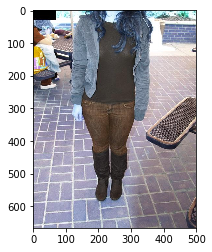

KeyError: '0-4-173.jpg'

In [43]:
name = names[i]
i += 1

im = cv2.imread(os.path.join(im_dir,name))
im = im/255
plt.imshow(im)
plt.show()
print(name,info[name],class_ids_dict[info[name]['label']])

# only show image

---
展示图片

In [1]:
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
im_dir = './up-3d/'
names = os.listdir(im_dir)

In [3]:
i = 0

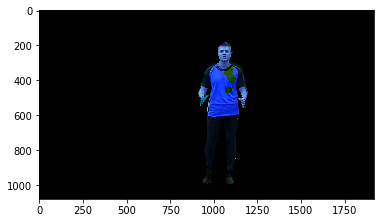

In [32]:
name = names[i]
i += 1
im = cv2.imread(os.path.join(im_dir,name))
im = im/255
plt.imshow(im)
plt.show()

# Delete empty label in dataset

---
删除分类中 empty分类

In [9]:
import json

In [10]:
f = open('./women_v4_label_by_shape.json','r')
infos = json.load(f)

In [11]:
new_infos = {}
for i in infos.keys():
    if infos[i]['label'] == 4:
        continue
    new_infos[i] = infos[i]

In [12]:
len(new_infos),len(infos)

(16518, 16518)

In [5]:
f = open('./women_v3_label_by_shape.json','w')
f.write(json.dumps(new_infos,indent=2))

64105

# Sample equilibrium

---
简易样本均衡

In [8]:
import json
import random

In [9]:
f = open('./women_v2_train.json','r')
infos = json.load(f)
f.close()

In [10]:
len(infos)

16985

In [11]:
new_infos = {}
for key in infos.keys():
    if infos[key]['label'] == 0 and random.random() < 0.5:
        continue
    new_infos[key] = infos[key]

In [12]:
len(new_infos)

11993

In [13]:
f = open('./women_v2_train_equ.json','w')
f.write(json.dumps(new_infos,indent=2))

872680

# change up-3d to mask

---
up-3d数据集，根据GT，将RGB图转换成01 mask图  
效果可以参考up-3d origin mask box mask-box部分代码

In [47]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [48]:
im_dir = './up-3d/'
names = os.listdir(im_dir)
out_im_dir = './up-3d-mask/'
if not os.path.exists(out_im_dir):
    os.makedirs(out_im_dir)

In [70]:
for i,name in enumerate(names):
    im_path = os.path.join(im_dir,name)
    out_im_path = os.path.join(out_im_dir,name)
    im = cv2.imread(im_path)
    if im is None:
        print(name)
        continue
    new_im = im[:,:,0] + im[:,:,1] + im[:,:,2]
    new_im[new_im != 0] = 1
    new_im = np.expand_dims(new_im,axis=2)
    new_im = np.concatenate((new_im,new_im,new_im),axis=2)
#     plt.figure(2)
#     plt.imshow(new_im[:,:,2])
#     plt.show()
    cv2.imwrite(out_im_path,new_im)
    print(i,'/',len(names),end='\r')

# split up-3d by bbox

---
up-3d数据集，根据mask将含有大面积背景（虽然背景已经被过滤成全0）RGB图片裁剪成贴合人的图片(RGB图+mask图)  
效果可以参考up-3d origin mask box mask-box部分代码

In [4]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [5]:
im_dir = './up-3d/'
names = os.listdir(im_dir)
box_out_im_dir = './up-3d-box/'
mask_box_out_im_dir = './up-3d-mask-box'
if not os.path.exists(mask_box_out_im_dir):
    os.makedirs(mask_box_out_im_dir)
if not os.path.exists(box_out_im_dir):
    os.makedirs(box_out_im_dir)    

In [6]:
for i,name in enumerate(names):
    im_path = os.path.join(im_dir,name)
    box_out_im_path = os.path.join(box_out_im_dir,name)
    mask_box_out_im_path = os.path.join(mask_box_out_im_dir,name)
    im = cv2.imread(im_path)
    if im is None:
        print(name)
        continue
    origin_im = im
    im = im[:,:,0] + im[:,:,1] + im[:,:,2]
    im[im != 0] = 1
    new_im = np.expand_dims(im,axis=2)
    new_im = np.concatenate((new_im,new_im,new_im),axis=2)
    x_list,y_list = np.where(im == 1)
    x = np.min(x_list)
    y = np.min(y_list)
    xh = np.max(x_list)
    yh = np.max(y_list)
    new_im_mask_box = new_im[x:xh,y:yh,:]
    new_im_box = origin_im[x:xh,y:yh,:]
#     plt.figure(2)
#     plt.imshow(new_im[:,:,2])
#     plt.show()
    cv2.imwrite(box_out_im_path,new_im_box)
    cv2.imwrite(mask_box_out_im_path,new_im_mask_box)
    print(i+1,'/',len(names),end='\r')

# up-3d origin mask box mask-box

---
展示对up-3d数据集的多种处理方式效果

In [9]:
import os
import cv2

In [8]:
origin_im_dir = './up-3d/'
mask_im_dir = './up-3d-mask/'
box_im_dir = './up-3d-box/'
mask_box_im_dir = './up-3d-mask-box/'
im_names = os.listdir(origin_im_dir)

In [10]:
index = 0

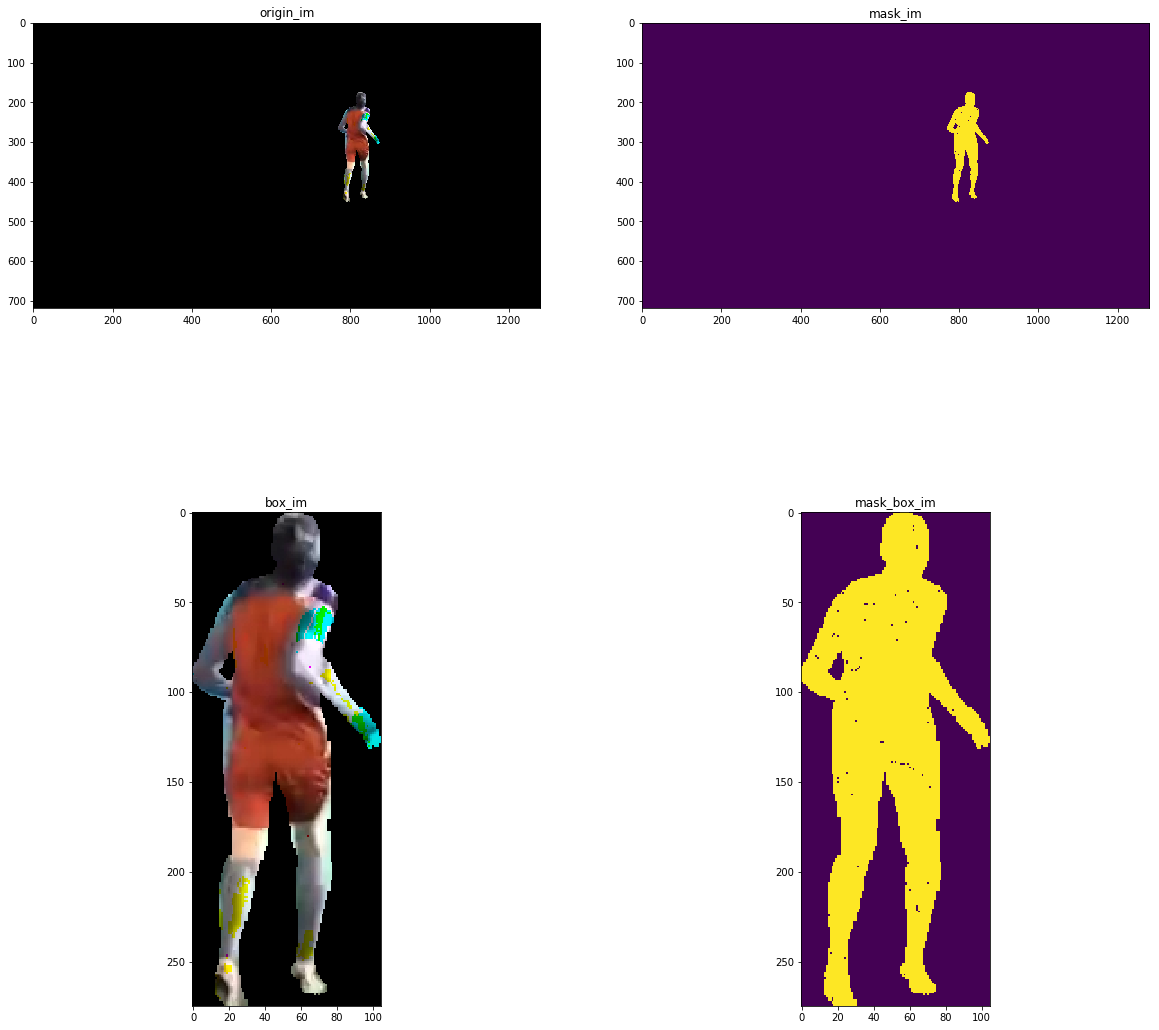

In [16]:
name = im_names[index]
index += 1

origin_im_path = os.path.join(origin_im_dir,name)
origin_im = cv2.imread(origin_im_path)

mask_im_path= os.path.join(mask_im_dir,name)
#三通道数据一样，只取第一个通道显示，设置三通道为了匹配网络输入
mask_im = cv2.imread(mask_im_path)[:,:,0]

box_im_path= os.path.join(box_im_dir,name)
box_im = cv2.imread(box_im_path)

mask_box_im_path= os.path.join(mask_box_im_dir,name)
#三通道数据一样，只取第一个通道显示，设置三通道为了匹配网络输入
mask_box_im = cv2.imread(mask_box_im_path)[:,:,0]

plt.figure(figsize=(20,20))
plt.subplot(221)
plt.title('origin_im')
plt.imshow(origin_im)
plt.subplot(222)
plt.title('mask_im')
plt.imshow(mask_im)
plt.subplot(223)
plt.title('box_im')
plt.imshow(box_im)
plt.subplot(224)
plt.title('mask_box_im')
plt.imshow(mask_box_im)
plt.show()

# im resize

In [86]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [87]:
def imread(path,im_shape):
    im = cv2.imread(path)
    if im is None:
        return None
    cen_x = int(im_shape[0]/2)
    cen_y = int(im_shape[1]/2)
#     im = im/255
    im_pad = np.zeros(im_shape,dtype=np.uint8)
    h,w = im.shape[:2]
    if h/w > im_shape[0]/im_shape[1]:
        re_h = im_shape[0]
        re_w = int(w * (re_h / h))
    else:
        re_w = im_shape[1]
        re_h = int(h * (re_w / w))
    re_im = cv2.resize(im,(re_w,re_h))
    x1 = int(cen_x - re_w/2)
    x2 = int(cen_x + re_w/2)
    y1 = int(cen_y - re_h/2)
    y2 = int(cen_y + re_h/2)
    im_pad[y1:y2,x1:x2,:] = re_im.copy()
    return im_pad,im

### single image

In [ ]:
name = '400_1.jpg'
im_path = './test_human/{}'.format(name)

In [64]:
new_im,im_ori = imread(im_path,(512,512,3))

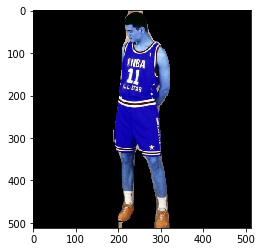

In [65]:
plt.imshow(new_im)
plt.show()

In [66]:
cv2.imwrite('./test_human_512/{}'.format(name),new_im)

True

### image dir

In [88]:
im_dir = './test_box/'
output_dir = './test_box_512/'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
names = os.listdir(im_dir)

In [89]:
for i,name in enumerate(names):
    try:
        print(i+1,'/',len(names),end='\r')
        im_path = os.path.join(im_dir,name)
        output_path = os.path.join(output_dir,name[:-4]+'.png')
        new_im,im_ori = imread(im_path,(512,512,3))
        cv2.imwrite(output_path,new_im)
    except Exception as e:
        print(e)